In [4]:
import pandas as pd
data = pd.read_csv('cleaned_data.csv')
data.head()

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Behaviour_Spending_Level,Behaviour_Value_Size,Monthly_Balance,Credit_Score
0,0x1628a,CUS_0x1000,January,17,Lawyer,30625.94,2706.16,6,5,27,...,26.61,122,Yes,42.94,244.75,Low_spent_Large_value_payments,Low_spent,Large_value_payments,252.92,Standard
1,0x1628b,CUS_0x1000,February,17,Lawyer,30625.94,NaN,6,5,27,...,29.44,123,Yes,42.94,176.13,High_spent_Small_value_payments,High_spent,Small_value_payments,311.54,Poor
2,0x1628c,CUS_0x1000,March,17,Lawyer,30625.94,2706.16,6,5,27,...,38.29,124,Yes,42.94,109.06,High_spent_Medium_value_payments,High_spent,Medium_value_payments,368.62,Poor
3,0x1628d,CUS_0x1000,April,17,Lawyer,30625.94,2706.16,6,5,27,...,32.84,125,Yes,42.94,87.91,Not available,Not available,Not available,419.77,Poor
4,0x1628e,CUS_0x1000,May,17,Lawyer,30625.94,2706.16,6,5,27,...,32.33,126,Yes,42.94,191.83,Low_spent_Large_value_payments,Low_spent,Large_value_payments,305.84,Poor


## Matplotlib graphs

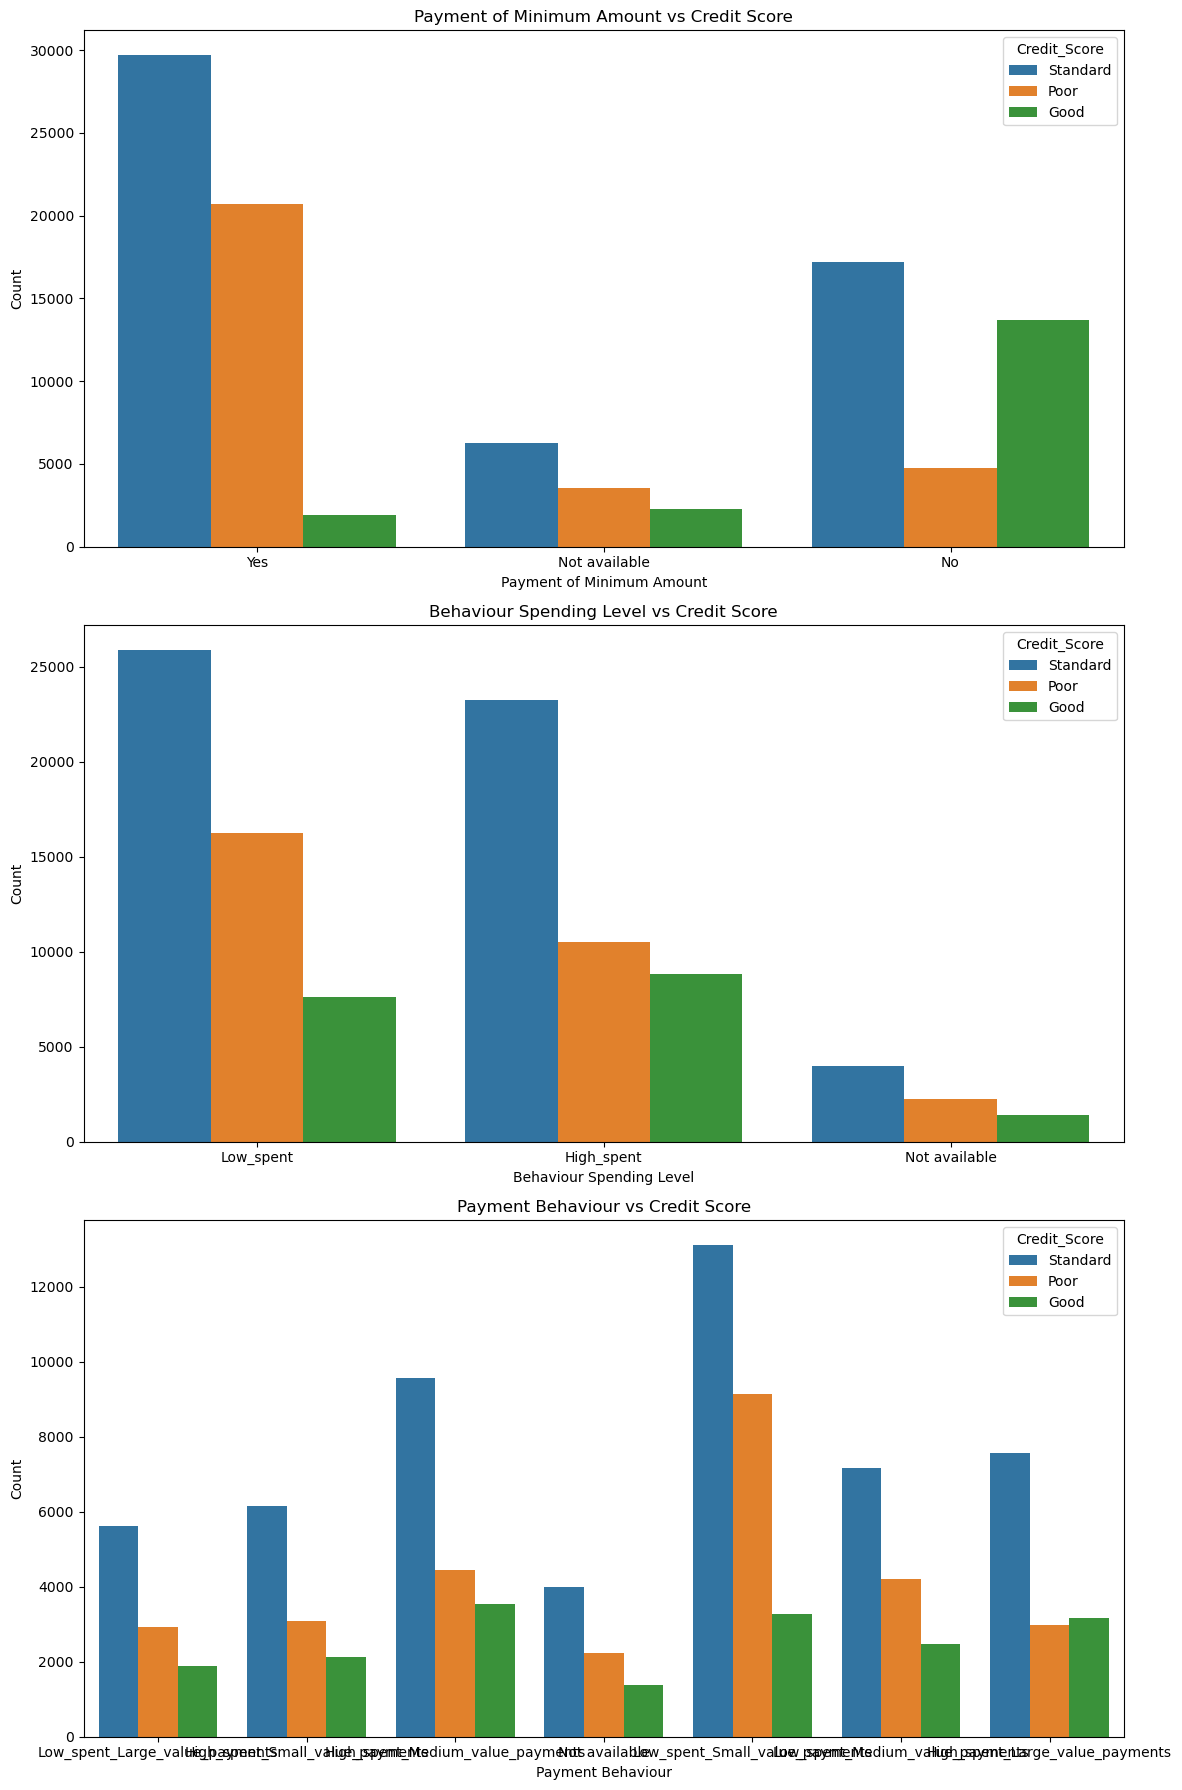

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns

# Filter out the key behavioral factors and subgroups for analysis
selected_columns = ['Age', 'Annual_Income', 'Occupation', 'Credit_Score', 
                    'Payment_of_Min_Amount', 'Behaviour_Spending_Level', 'Payment_Behaviour']
filtered_data = data[selected_columns]

# Drop rows with missing Credit_Score as we are focusing on the relationship with Credit Score
filtered_data = filtered_data.dropna(subset=['Credit_Score'])

# Visualizations
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: Payment_of_Min_Amount vs Credit_Score
sns.countplot(x='Payment_of_Min_Amount', hue='Credit_Score', data=filtered_data, ax=axes[0])
axes[0].set_title('Payment of Minimum Amount vs Credit Score')
axes[0].set_xlabel('Payment of Minimum Amount')
axes[0].set_ylabel('Count')

# Plot 2: Behaviour_Spending_Level vs Credit_Score
sns.countplot(x='Behaviour_Spending_Level', hue='Credit_Score', data=filtered_data, ax=axes[1])
axes[1].set_title('Behaviour Spending Level vs Credit Score')
axes[1].set_xlabel('Behaviour Spending Level')
axes[1].set_ylabel('Count')

# Plot 3: Payment_Behaviour vs Credit_Score
sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=filtered_data, ax=axes[2])
axes[2].set_title('Payment Behaviour vs Credit Score')
axes[2].set_xlabel('Payment Behaviour')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Plotly dash graphs

In [6]:
import dash
from dash import html, dcc, Input, Output
import plotly.express as px


# Define the age and income groups
age_groups = {
    '0-17': (0, 17),
    '18-24': (18, 24),
    '25-34': (25, 34),
    '35-44': (35, 44),
    '45-54': (45, 54),
    '55-64': (55, 64),
    '65-74': (65, 74),
    '75-84': (75, 84),
    '85+': (85, data['Age'].max())
}

income_groups = {
    '0-20k': (0, 20000),
    '20k-40k': (20000, 40000),
    '40k-60k': (40000, 60000),
    '80k-100k': (80000, 100000),
    '100k-120k': (100000, 120000),
    '120k-140k': (120000, 140000),
    '140k-160k': (140000, 160000),
    '180k-200k': (180000, 200000),
    '200k+': (200000, data['Annual_Income'].max())
}

# Initialize the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='subgroup-select',
        options=[
            {'label': 'Age', 'value': 'Age'},
            {'label': 'Income', 'value': 'Income'},
            # Add other subgroups as needed
        ],
        value='Age'  # Default value
    ),
    dcc.Dropdown(
        id='segment-select',
        # Options will be set based on the callback
    ),
    dcc.Dropdown(
        id='behavior-select',
        options=[
            {'label': 'Payment of Minimum Amount', 'value': 'Payment_of_Min_Amount'},
            {'label': 'Behaviour Spending Level', 'value': 'Behaviour_Spending_Level'},
            # Add other behaviors as needed
        ],
        value='Payment_of_Min_Amount'  # Default value
    ),
    dcc.Dropdown(
        id='graph-type-select',
        options=[
            {'label': 'Bar Chart', 'value': 'bar'},
            {'label': 'Box Plot', 'value': 'box'},
            {'label': 'Violin Plot', 'value': 'violin'}
        ],
        value='bar'  # Default graph type
    ),
    dcc.Graph(id='bar-plot')
])

@app.callback(
    Output('segment-select', 'options'),
    Input('subgroup-select', 'value')
)

# Callback to set segment options based on the selected subgroup
def set_segment_options(selected_subgroup):
    if selected_subgroup == 'Age':
        return [{'label': label, 'value': label} for label in age_groups.keys()]
    elif selected_subgroup == 'Income':
        return [{'label': label, 'value': label} for label in income_groups.keys()]
    else:
        return []


@app.callback(
    Output('graph', 'figure'),
    [Input('subgroup-select', 'value'),
     Input('segment-select', 'value'),
     Input('behavior-select', 'value'),
     Input('graph-type-select', 'value')]
)

# Callback to update the bar plot based on the selected options
def update_graph(subgroup, segment, behavior):
    if subgroup == 'Age':
        age_range = age_groups.get(segment, (0, 0))
        filtered_data = data[(data['Age'] >= age_range[0]) & (data['Age'] <= age_range[1])]
    elif subgroup == 'Income':
        income_range = income_groups.get(segment, (0, 0))
        filtered_data = data[(data['Annual_Income'] >= income_range[0]) & (data['Annual_Income'] <= income_range[1])]
    else:
        filtered_data = data

    if graph_type == 'bar':
        fig = px.bar(filtered_data, x=behavior, color='Credit_Score', barmode='group')
    elif graph_type == 'box':
        fig = px.box(filtered_data, x=behavior, y='Credit_Score', color='Credit_Score')
    elif graph_type == 'violin':
        fig = px.violin(filtered_data, x=behavior, y='Credit_Score', color='Credit_Score', box=True)

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
